In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [5]:
data = pd.read_csv(R'C:\Users\RajnarayanSahu\OneDrive - National Pen Company\Documents\All imp files\Data Science\Projects\Credit Card Fraud\application_data.csv')

In [6]:
data.shape

data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
data.shape

(307511, 122)

In [9]:
(data.isnull().mean()*100).sort_values(ascending=False).head(n=50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [10]:
data_new = data
cols = data_new.columns

for i in range(0,len(cols)):
    if cols[i].find("_MEDI")!=-1 or cols[i].find("_AVG")!=-1 or cols[i].find("_MODE")!=-1:
        data_new = data_new.drop([str(cols[i])],axis=1)

In [11]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [12]:
cols = data_new.columns

for i in range(0,len(cols)):
    if cols[i].find("FLAG_DOCUMENT_")!=-1:
        data_new = data_new.drop([str(cols[i])],axis=1)

In [13]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [14]:
data_new = data_new.drop(["FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL"],axis=1)

In [15]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [16]:
(data_new.isnull().mean()*100).sort_values(ascending=False).head(n=50)

OWN_CAR_AGE                    65.990810
EXT_SOURCE_1                   56.381073
OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
REG_REGION_NOT_LIVE_REGION      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIV

In [17]:
data_new = data_new.drop(["OWN_CAR_AGE"],axis=1)

In [18]:
(data_new.isnull().mean()*100).sort_values(ascending=False).head(n=10)

EXT_SOURCE_1                  56.381073
OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
dtype: float64

In [19]:
data_new.loc[:,"AMT_REQ_CREDIT_BUREAU_YEAR"] = data_new.fillna(data_new["AMT_REQ_CREDIT_BUREAU_YEAR"].median())
data_new.loc[:,"AMT_REQ_CREDIT_BUREAU_QRT"] = data_new.fillna(data_new["AMT_REQ_CREDIT_BUREAU_QRT"].median())
data_new.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR"] = data_new.fillna(data_new["AMT_REQ_CREDIT_BUREAU_HOUR"].median())
data_new.loc[:,"AMT_REQ_CREDIT_BUREAU_MON"] = data_new.fillna(data_new["AMT_REQ_CREDIT_BUREAU_MON"].median())
data_new.loc[:,"AMT_REQ_CREDIT_BUREAU_WEEK"] = data_new.fillna(data_new["AMT_REQ_CREDIT_BUREAU_WEEK"].median())
data_new.loc[:,"AMT_REQ_CREDIT_BUREAU_DAY"] = data_new.fillna(data_new["AMT_REQ_CREDIT_BUREAU_DAY"].median())

In [20]:
data_new.loc[:,"EXT_SOURCE_1"] = data_new.fillna(data_new["EXT_SOURCE_1"].mean())
data_new.loc[:,"EXT_SOURCE_3"] = data_new.fillna(data_new["EXT_SOURCE_3"].mean())

In [21]:
#data[(data["ORGANIZATION_TYPE"]=="XNA")]["OCCUPATION_TYPE"].value_counts()
data_new.loc[data_new["ORGANIZATION_TYPE"]=="XNA","ORGANIZATION_TYPE"] = data_new.loc[data_new["ORGANIZATION_TYPE"]=="XNA","ORGANIZATION_TYPE"].replace("XNA","Pensioners")

data_new["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
Pensioners                55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [22]:
data_new.loc[data_new["OCCUPATION_TYPE"].isnull()==True,"OCCUPATION_TYPE"] = data_new.loc[data_new["OCCUPATION_TYPE"].isnull()==True,"OCCUPATION_TYPE"].fillna(data["ORGANIZATION_TYPE"].mode()[0])

In [31]:
data_new.loc[:,"NAME_TYPE_SUITE"] = data_new.loc[:,"NAME_TYPE_SUITE"].fillna(data_new["NAME_TYPE_SUITE"].mode()[0])
data_new.loc[:,"DEF_30_CNT_SOCIAL_CIRCLE"] = data_new.loc[:,"DEF_30_CNT_SOCIAL_CIRCLE"].fillna(data_new["DEF_30_CNT_SOCIAL_CIRCLE"].mean())
data_new.loc[:,"DEF_60_CNT_SOCIAL_CIRCLE"] = data_new.loc[:,"DEF_60_CNT_SOCIAL_CIRCLE"].fillna(data_new["DEF_60_CNT_SOCIAL_CIRCLE"].mean())
data_new.loc[:,"OBS_60_CNT_SOCIAL_CIRCLE"] = data_new.loc[:,"OBS_60_CNT_SOCIAL_CIRCLE"].fillna(data_new["OBS_60_CNT_SOCIAL_CIRCLE"].mean())
data_new.loc[:,"OBS_30_CNT_SOCIAL_CIRCLE"] = data_new.loc[:,"OBS_30_CNT_SOCIAL_CIRCLE"].fillna(data_new["OBS_30_CNT_SOCIAL_CIRCLE"].mean())


In [33]:
data_new.loc[:,"EXT_SOURCE_2"] = data_new.loc[:,"EXT_SOURCE_2"].fillna(data_new["EXT_SOURCE_2"].mean())
data_new.loc[:,"AMT_GOODS_PRICE"] = data_new.loc[:,"AMT_GOODS_PRICE"].fillna(data_new["AMT_GOODS_PRICE"].mean())
data_new.loc[:,"AMT_ANNUITY"] = data_new.loc[:,"AMT_ANNUITY"].fillna(data_new["AMT_ANNUITY"].mean())
data_new.loc[:,"CNT_FAM_MEMBERS"] = data_new.loc[:,"CNT_FAM_MEMBERS"].fillna(data_new["CNT_FAM_MEMBERS"].mode()[0])
data_new.loc[:,"DAYS_LAST_PHONE_CHANGE"] = data_new.loc[:,"DAYS_LAST_PHONE_CHANGE"].fillna(data_new["DAYS_LAST_PHONE_CHANGE"].mean())

In [34]:
((data_new.isnull().mean()*100).sort_values(ascending=False).head(n=11))

SK_ID_CURR                     0.0
TARGET                         0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
ORGANIZATION_TYPE              0.0
EXT_SOURCE_1                   0.0
dtype: float64

In [44]:
laben = LabelEncoder()
cols1 = data_new.columns
for i in range(0,len(cols1)):
    if data_new[str(cols1[i])].dtypes==object:
        data_new[str(cols1[i])] = laben.fit_transform(data[str(cols1[i])])


In [46]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  int32  
 3   CODE_GENDER                  307511 non-null  int32  
 4   FLAG_OWN_CAR                 307511 non-null  int32  
 5   FLAG_OWN_REALTY              307511 non-null  int32  
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  int32  
 12  NAME_INCOME_TYPE             307511 non-null  int32  
 13 

In [48]:
y = data_new["TARGET"]

In [49]:
X = data_new.drop("TARGET",axis=1)

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [57]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train,y_train)

In [58]:
X_test = sc.transform(X_test)

In [94]:
LR = LogisticRegression(max_iter=1000,class_weight={0:0.3,1:0.7})
LR.fit(X_train,y_train)
y_test_pred = LR.predict(X_test)

In [95]:
y_test_pred_prob = LR.predict_proba(X_test)[::,1]

In [96]:
acc = metrics.accuracy_score(y_test,y_test_pred)
prec = metrics.precision_score(y_test,y_test_pred)
rec = metrics.recall_score(y_test,y_test_pred)
roc = metrics.roc_auc_score(y_test,y_test_pred)

print("Accuracy: ",acc)
print("Precision: ",prec)
print("Recall: ",rec)
print("ROC AUC Score: ",roc)

Accuracy:  0.9127300713248206
Precision:  0.3507951356407858
Recall:  0.10117361392148927
ROC AUC Score:  0.5424067996529571


In [97]:
cm = np.array([[metrics.confusion_matrix(y_test,y_test_pred)]])
cm

array([[[[83453,  1388],
         [ 6663,   750]]]], dtype=int64)

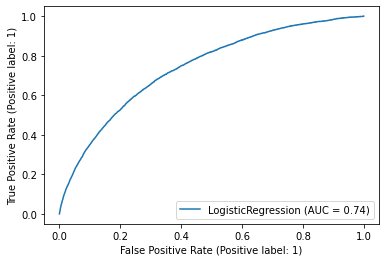

In [98]:
import warnings
warnings = warnings.filterwarnings("ignore")
metrics.plot_roc_curve(LR,X_test,y_test)